###### The original MATLAB code was developed by Prof. Hyunseok Oh (Gwangju Institute of Science and Technology, South Korea, hsoh@gist.ac.kr).

# SVM with PC scores

In [1]:
##### Load Data and function----------------------------------------------------------------------
load('saved_data/pca.rds')
source('subfunction/data_partition_manual.R')

In [2]:
##### SVM with PC Change -------------------------------------------------------------------------
library(e1071)
Valid_accuracy <- NULL
Variance <- explained
False_data <- list()

for (i in 1:20) {
  pca_data <- score[, 1:i]
  
  # Set Training, Test, Vaildation Data
  data_partition_manual(pca_data)
  
  # Training
  rbf_Model <- svm(y = train_label, x = train_data, data = data.frame(train_data, train_label),
                   type = 'C-classification',
                   cost = 1,
                   kernel = 'radial',
                   gamma = 1)  # gamma in R == 1 / sigma^2 in Matlab
  
  # Validation
  predict_label <- predict(rbf_Model, data.frame(valid_data))
  accuracy <- sum(predict_label == valid_label) / length(valid_label) * 100
  Valid_accuracy[i] <- accuracy
  False_data[[i]] <- data.frame(predict_label, valid_label)
}

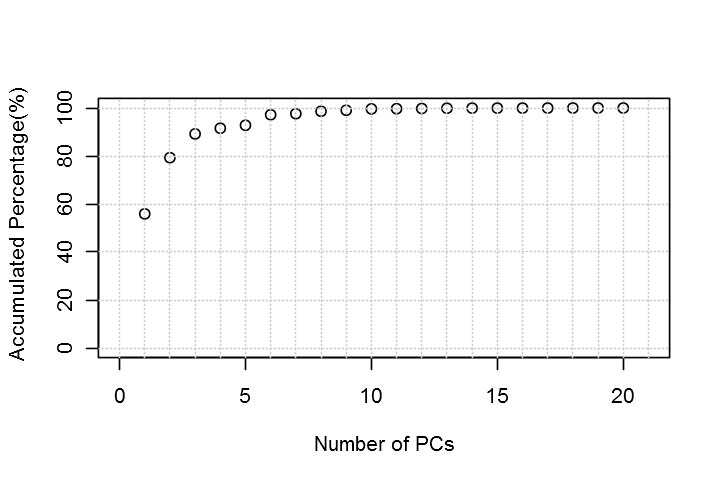

In [8]:
##### Plot Percentage of The Total Variance ------------------------------------------------------
options(repr.plot.width = 6, repr.plot.height = 4)
plot(100 - Variance, xlim = c(0, 21), ylim = c(0, 100),
     xlab = "Number of PCs", ylab = "Accumulated Percentage(%)")
abline(h = seq(0, 100, 20), v = seq(0, 21, 1), lty = 3, col = gray(0.8))

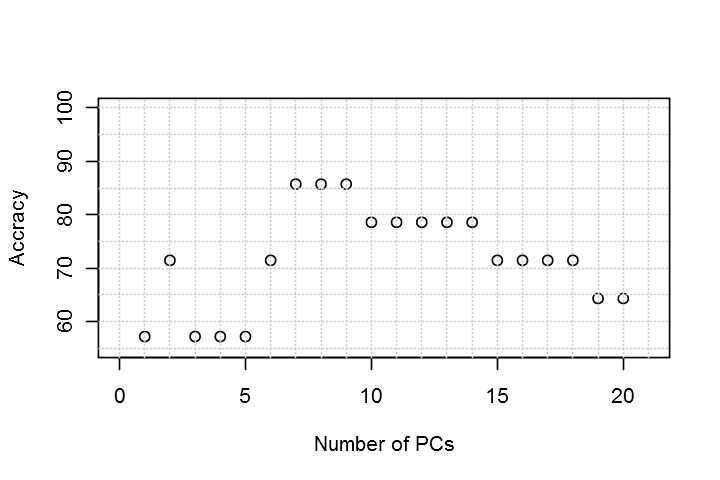

In [7]:
##### Plot Validation Accuracy -------------------------------------------------------------------
plot(Valid_accuracy, xlim = c(0, 21), ylim = c(55, 100),
     xlab = "Number of PCs", ylab = "Accracy")
abline(h = seq(55, 100, 5), v = seq(0, 21, 1), lty = 3, col = gray(0.8))